## 1. Landmark
 - 눈 코 입 귀와 같은 얼굴 각각의 위치를 찾아내야 하는데, 그 기술을 Landmark 또는 alignment라고 한다.
 
 ![img1](cameraim1.png)
 - 1. 얼굴 사진 준비
 - 2. 얼굴의 Bounding box 찾기
 - 3. Face Landmark 찾기
 - 4. 머리에 왕관 스티커 붙이기
 
 
 
 #### 먼저 라이브러리를 설치하지ㅏ
 
```
$ pip install opencv-python
$ pip install cmake
$ pip install dlib
```

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

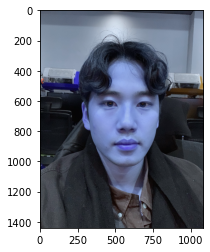

In [30]:
import os
img_bgr = cv2.imread('photo_0.JPG')    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr,dsize=(0,0),fx=0.5,fy=0.5)   # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

 #### OpenCV 의 특징상, BGR(Blue, Green ,Red) 순으로 채널을 사용해서 색이 이상하다.
 => 따라서 RGB로 변경해주어야 한다.
 
 [OpenCV 참고] :https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

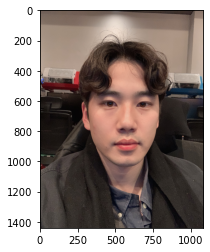

In [31]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

#### cv2.imread( img, n)
n 에 숫자를 넣어 세가지 모드로 이미지를 불러올 수 있다.
- -1 : Imread_COLOR
- 0 : Imread _Gray
- 1 : alpha channel까지 포함해서 읽어오기 ( alpha 채널은 투명도)

## 얼굴 검출 : Face Detection

- dlib의 Face detector 사용. HOG(Histogram of Oriented Gradient) Feautre로 얼굴을 찾는다.

참고 : https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

In [32]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

In [33]:
# 얼굴 Bounding Box 추출
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
dlib_rects

rectangles[[(295, 480) (849, 1035)]]

rectangles[[(295, 480) (849, 1035)]]


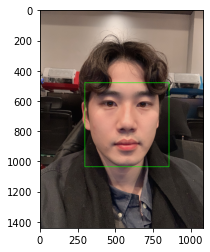

In [34]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [35]:
dlib_rects[0].top()

480

## Face Landmark

 - Face Detection의 결과물은 Bounding Box로 찾아낸다.
 - Object keypoing estimation : 객체 내부의 점을 찾는 기술.
 
 1) top-down : bounding box를 찾고 box 내부의 keypoint를 예측

2) bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

예제에서는 1번 방식으로
 

- Dlib landmark localization 은 ibug 300-W 데이터셋으로 학습한 pretrained model을 제공.

- 알고리즘 마다 keypoint의 갯수가 다른데, ibug는 68개를 사용한다.


[300-W data] :https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/


공개되어 있는 Weight file 다운로드.

```
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
$ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models
$ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2
```

In [36]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [37]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))#얼굴의 keypoint(landmakr)수

68


In [27]:
list_landmarks

[[(618, 1241),
  (629, 1381),
  (651, 1519),
  (676, 1654),
  (721, 1780),
  (798, 1894),
  (900, 1984),
  (1019, 2046),
  (1151, 2058),
  (1274, 2032),
  (1367, 1955),
  (1438, 1852),
  (1494, 1740),
  (1530, 1621),
  (1557, 1501),
  (1575, 1380),
  (1580, 1257),
  (720, 1132),
  (796, 1071),
  (898, 1061),
  (997, 1075),
  (1088, 1113),
  (1225, 1115),
  (1309, 1082),
  (1398, 1071),
  (1486, 1082),
  (1543, 1144),
  (1157, 1234),
  (1157, 1325),
  (1157, 1417),
  (1159, 1510),
  (1053, 1594),
  (1104, 1603),
  (1154, 1614),
  (1201, 1603),
  (1246, 1591),
  (829, 1240),
  (888, 1216),
  (953, 1221),
  (1005, 1264),
  (947, 1275),
  (880, 1271),
  (1281, 1266),
  (1333, 1225),
  (1395, 1223),
  (1445, 1248),
  (1401, 1273),
  (1338, 1276),
  (969, 1782),
  (1040, 1745),
  (1109, 1711),
  (1155, 1726),
  (1202, 1708),
  (1261, 1737),
  (1315, 1769),
  (1265, 1826),
  (1211, 1860),
  (1159, 1869),
  (1107, 1867),
  (1038, 1839),
  (993, 1780),
  (1108, 1777),
  (1156, 1781),
  (1204, 1

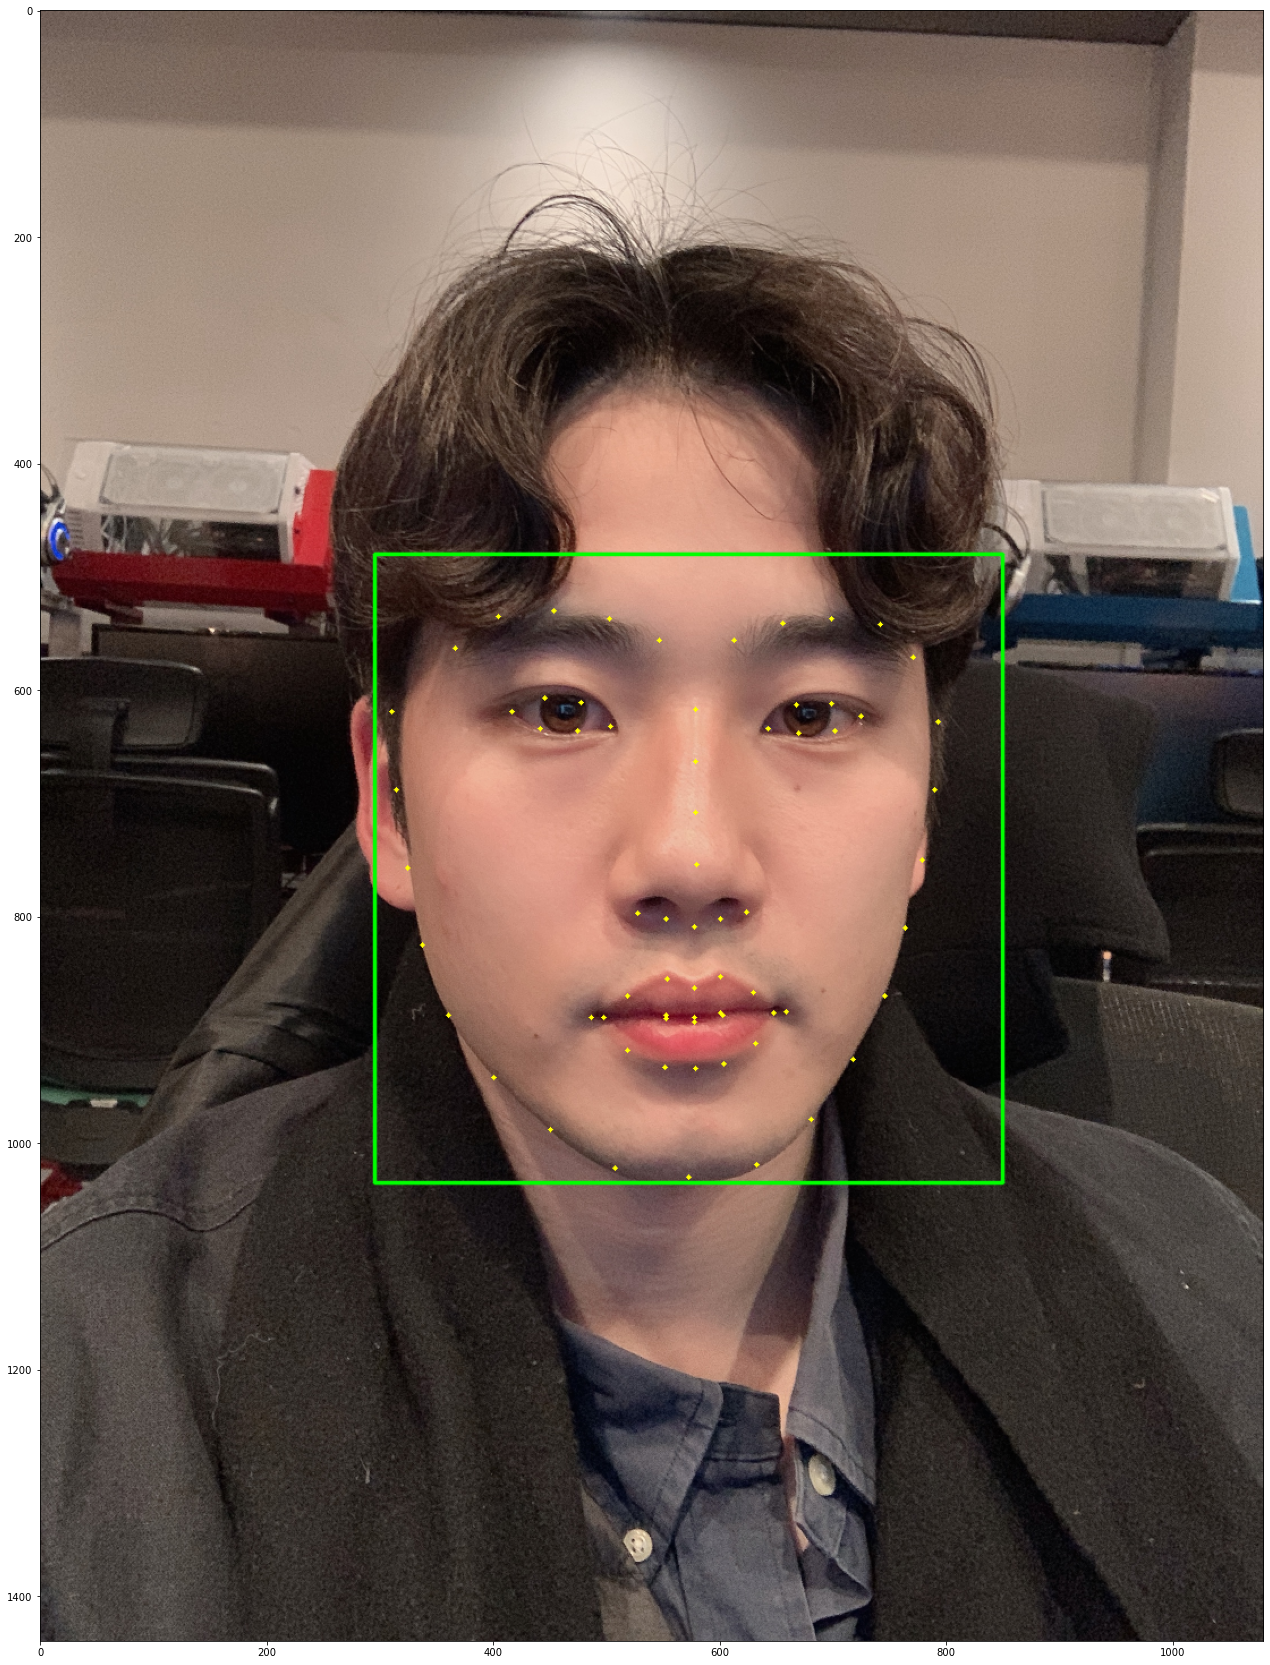

In [38]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (50,30))
plt.imshow(img_show_rgb)
plt.show()

## 스티커 붙이기

 - 눈썹 위 얼굴 중앙에 스티커 붙이자.
 
 ![im](E10im1.png)
 #### 스티커 위치와 크기를 구해야함.

 ![image](sticker_calim1.png)

In [39]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(579, 754)
(x,y) : (579,477)
(w,h) : (555,555)


In [41]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(555, 555, 3)
(x,y) : (302,-78)


#### y의 음수는 튀어나온 부분을 뜻한다. 따라서 제거해 줘야해!

![im](stickerim2.png)

In [42]:
# -y 만큼 Crop
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(477, 555, 3)


In [43]:
# top y좌표를 원본 이미지의 경계값으로 수정
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (302,0)


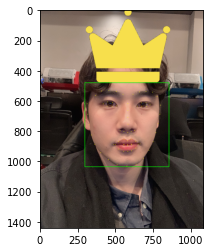

In [45]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

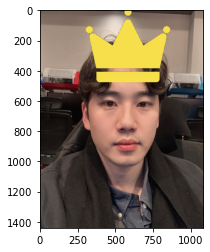

In [46]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()